<a href="https://colab.research.google.com/github/MithunSR/Gradient_Descent_Tutorial/blob/main/Gradient_Calculation_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction:
The provided code demonstrates how to calculate the gradient of a logistic regression model using the sigmoid function. It uses the Breast Cancer dataset from scikit-learn as a real-world example. The goal is to train a logistic regression model to predict whether a breast cancer tumor is benign or malignant.

##Dataset Loading and Preprocessing:
The code begins by loading the Breast Cancer dataset using the load_breast_cancer function from sklearn.datasets. The feature matrix X and the target vector y are extracted from the dataset. The data is then split into training and test sets using train_test_split from sklearn.model_selection. The feature matrix is transposed to have the shape (n_features, n_samples), and the target vector is reshaped to have the shape (1, n_samples).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Preprocess the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T  # Transpose X_train to have shape (n_features, n_samples)
X_test = X_test.T  # Transpose X_test to have shape (n_features, n_samples)
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)


##Sigmoid Function Definition:
The sigmoid function is defined as sigmoid(z) = 1 / (1 + exp(-z)). It takes a scalar or an array z as input and returns the corresponding sigmoid activation values.

In [7]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

##Parameter Initialization:
The parameters theta are initialized as a column vector of zeros with shape (n_features, 1). These parameters will be learned during the training process.

In [8]:
# Initialize the parameters
n_features, n_samples = X_train.shape
theta = np.zeros((n_features, 1))

##Gradient Calculation:
The gradient calculation is performed iteratively for the specified number of iterations. Each iteration consists of the following steps:

a. Forward Propagation:

   - The dot product `z` is computed as the matrix multiplication of `theta.T` and `X_train`. This represents the linear transformation of the input features.
   - The sigmoid function is applied to `z` to obtain the predicted probabilities `y_pred`.

b. Cost Computation:

   - The cost is calculated using the binary cross-entropy loss formula: `-mean(y_train * log(y_pred) + (1 - y_train) * log(1 - y_pred))`. This measures the discrepancy between the predicted probabilities and the actual target values.

c. Backward Propagation:

   - The difference between the predicted probabilities and the actual target values is computed as `dz = y_pred - y_train`.
   - The gradient with respect to the parameters is calculated as `dw = (1 / n_samples) * dot(X_train, dz.T)`. This represents the average contribution of each training sample to the cost function.

d. Parameter Update:

   - The parameters `theta` are updated using gradient descent: `theta = theta - learning_rate * dw`. The learning rate determines the step size in the direction of steepest descent.


In [9]:
# Perform gradient calculation
num_iterations = 10000
learning_rate = 0.00001

costs = []

for iteration in range(num_iterations):
    # Forward propagation
    z = np.dot(theta.T, X_train)
    y_pred = sigmoid(z)

    # Compute the cost
    cost = -np.mean(y_train * np.log(y_pred) + (1 - y_train) * np.log(1 - y_pred))
    costs.append(cost)

    # Backward propagation
    dz = y_pred - y_train
    dw = (1 / n_samples) * np.dot(X_train, dz.T)

    # Update the parameters
    theta = theta - learning_rate * dw

##Cost Plotting:
After the iterations, the cost values from each iteration are collected in the costs list. The code then plots the cost over iterations to visualize the convergence of the algorithm.


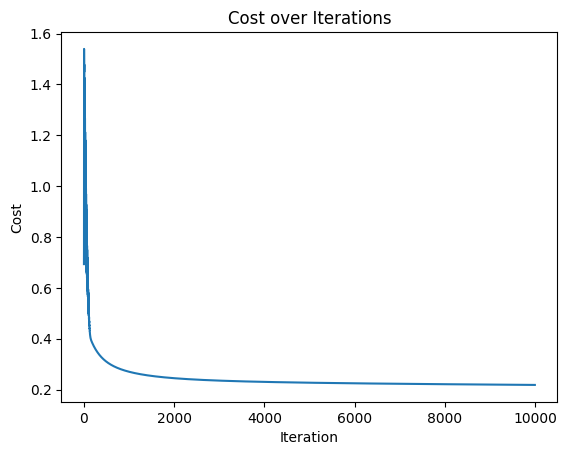

In [10]:
# Plot the cost over iterations
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.show()

Overall, the code showcases the process of training a logistic regression model by iteratively calculating the gradients using forward and backward propagation, and updating the parameters using gradient descent. The goal is to minimize the cost function and achieve accurate predictions on the Breast Cancer dataset.